In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("NetflixOriginals.csv",encoding='ISO-8859-1')
df = data.copy()
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [3]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [4]:
df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [6]:
df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [7]:
runtime = df.iloc[:,3:4]
imdb = df.iloc[:,4:5]
premiere = df.iloc[:,2:3]

### Distributions

C:\Users\reco1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


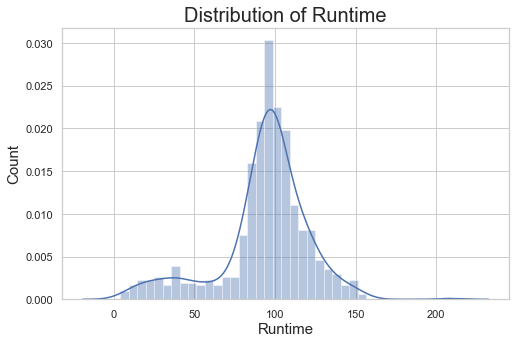

In [8]:
plt.figure(figsize = (8,5))
sns.set(style = "whitegrid")
sns.distplot(runtime)
plt.title("Distribution of Runtime", fontsize = 20)
plt.xlabel("Runtime", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

C:\Users\reco1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


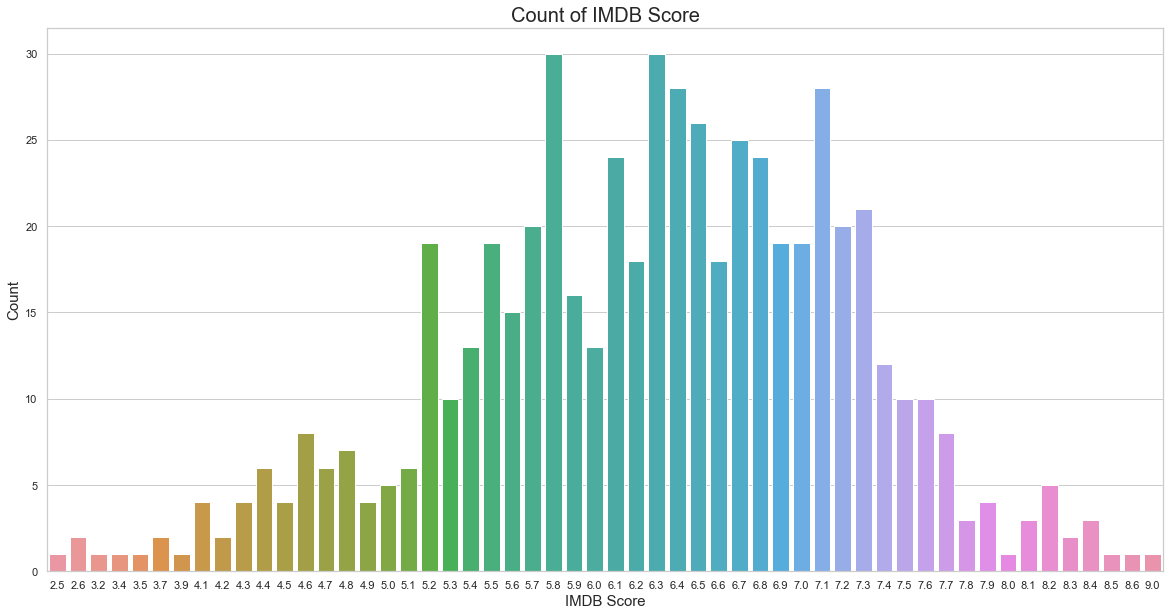

In [9]:
plt.figure(figsize = (20,10))
sns.countplot(df["IMDB Score"])
plt.title("Count of IMDB Score", fontsize = 20)
plt.xlabel("IMDB Score", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

### 1-) Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.
### (In which language were the long-running films created according to the dataset? Make a visualization)
 

In [10]:
q = df[(df['Runtime'] > 40)]
runtime_q = q.iloc[:,3:4]
language_q = q.iloc[:,-1]
first_q = pd.concat([runtime_q, language_q], axis=1)
first_q.sort_values("Runtime", ascending=False).reset_index(drop=True)

,Runtime,Language
0,209,English
1,155,English
2,153,English
3,151,English
4,151,Japanese
...,...,...
532,45,English
533,44,Portuguese
534,42,English
535,41,Bengali


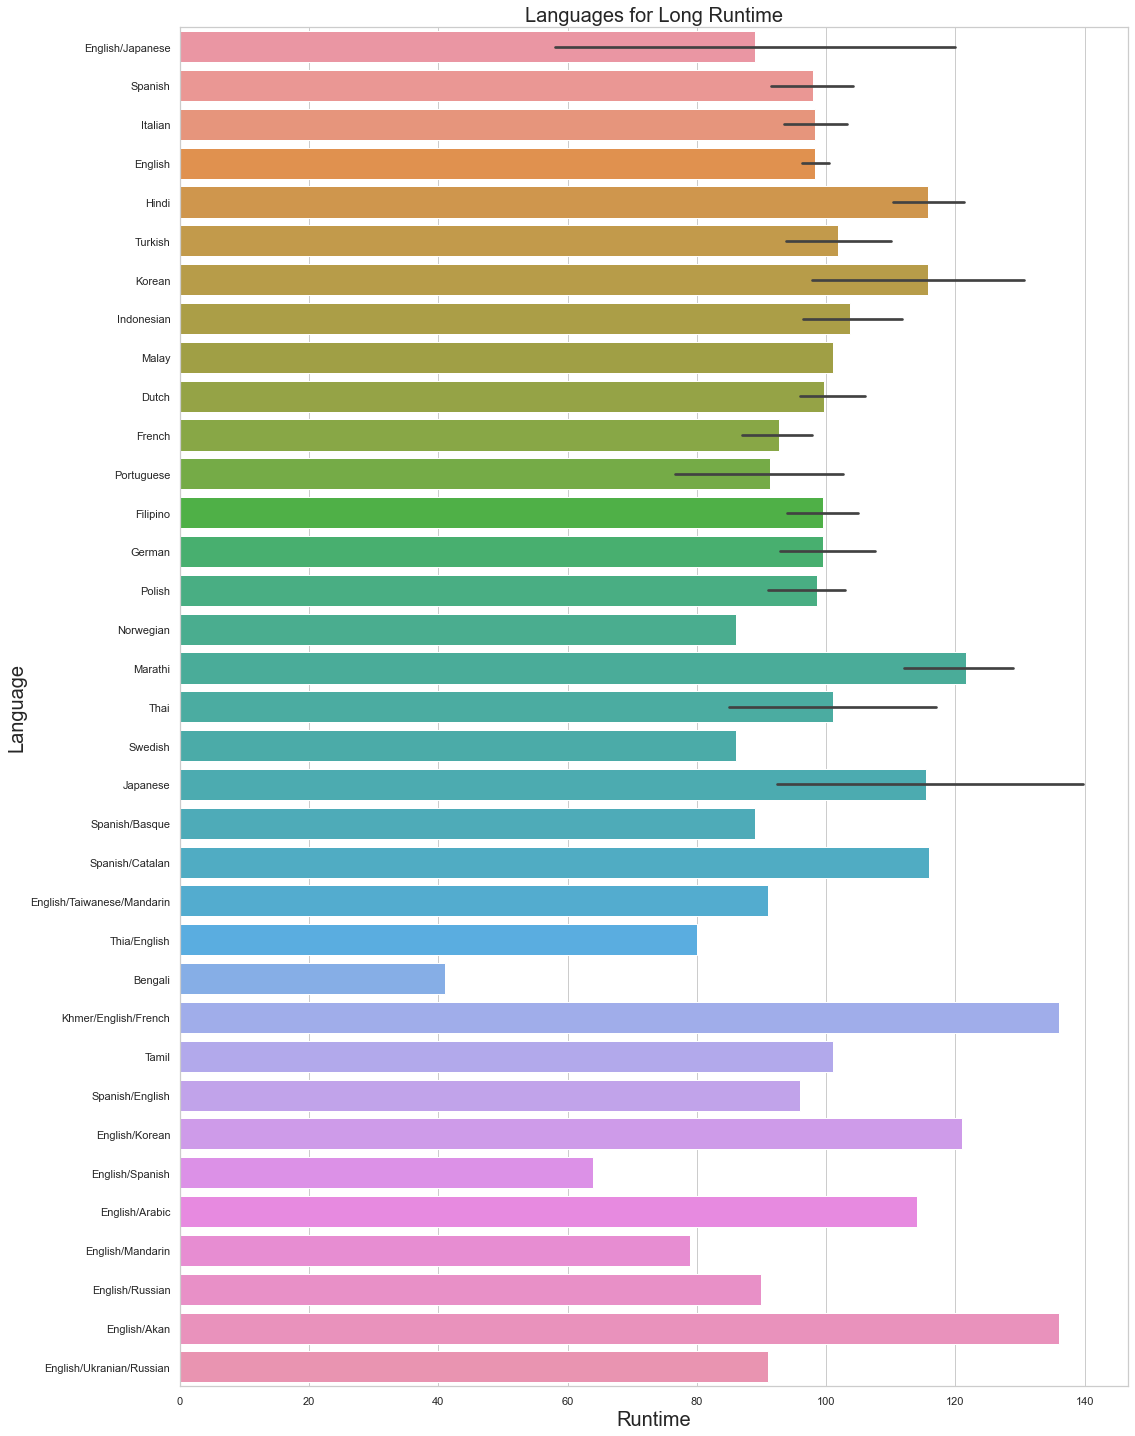

In [11]:
#Visualization
plt.figure(figsize = (17,25))
sns.barplot(data=first_q, x=first_q["Runtime"], y=first_q["Language"])
plt.title("Languages for Long Runtime", fontsize = 20)
plt.xlabel("Runtime", fontsize = 20)
plt.ylabel("Language", fontsize = 20)
plt.show()

### 2 -) 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.  
### (Find and visualize the IMDB values of the movies shot in the 'Documentary' genre between January 2019 and June 2020.)

In [12]:
df["Premiere"] = pd.to_datetime(df["Premiere"])
df["Premiere"]

0     2019-08-05
1     2020-08-21
2     2019-12-26
3     2018-01-19
4     2020-10-30
         ...    
579   2018-12-31
580   2015-10-09
581   2018-12-16
582   2020-12-08
583   2020-10-04
Name: Premiere, Length: 584, dtype: datetime64[ns]

In [13]:
second_q = df[(df["Genre"] == "Documentary") & (df['Premiere'] > '2019-01') & (df['Premiere'] < '2020-06')]
second_q

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
15,After the Raid,Documentary,2019-12-19,25,4.3,Spanish
20,"Hello Privilege. It's Me, Chelsea",Documentary,2019-09-13,64,4.4,English
30,After Maria,Documentary,2019-05-24,37,4.6,English/Spanish
111,Ghosts of Sugar Land,Documentary,2019-10-16,21,5.5,English
263,A Tale of Two Kitchens,Documentary,2019-05-22,30,6.3,English/Spanish
286,The Legend of Cocaine Island,Documentary,2019-03-29,87,6.3,English
290,Travis Scott: Look Mom I Can Fly,Documentary,2019-08-28,85,6.3,English
295,Birders,Documentary,2019-09-25,37,6.4,English/Spanish
303,Murder to Mercy: The Cyntoia Brown Story,Documentary,2020-04-29,97,6.4,English


In [14]:
doc_imdb = second_q.iloc[:,4:5]
doc_title = second_q.iloc[:,0:1]
q2 = pd.concat([doc_imdb,doc_title], axis=1)

new_q2 = pd.DataFrame(data = q2 ,columns=["IMDB Score","Title"])
new_q2 = new_q2.sort_values("IMDB Score", ascending=False).reset_index(drop=True)
new_q2

,IMDB Score,Title
0,8.3,Dancing with the Birds
1,7.9,A Secret Love
2,7.7,Crip Camp: A Disability Revolution
3,7.7,Brene Brown: The Call to Courage
4,7.6,Tell Me Who I Am
5,7.6,Rolling Thunder Revue: A bob Dylan Story by Ma...
6,7.5,Homecoming: A Film by Beyonce
7,7.4,Miss Americana
8,7.4,Fire in Paradise
9,7.4,American Factory


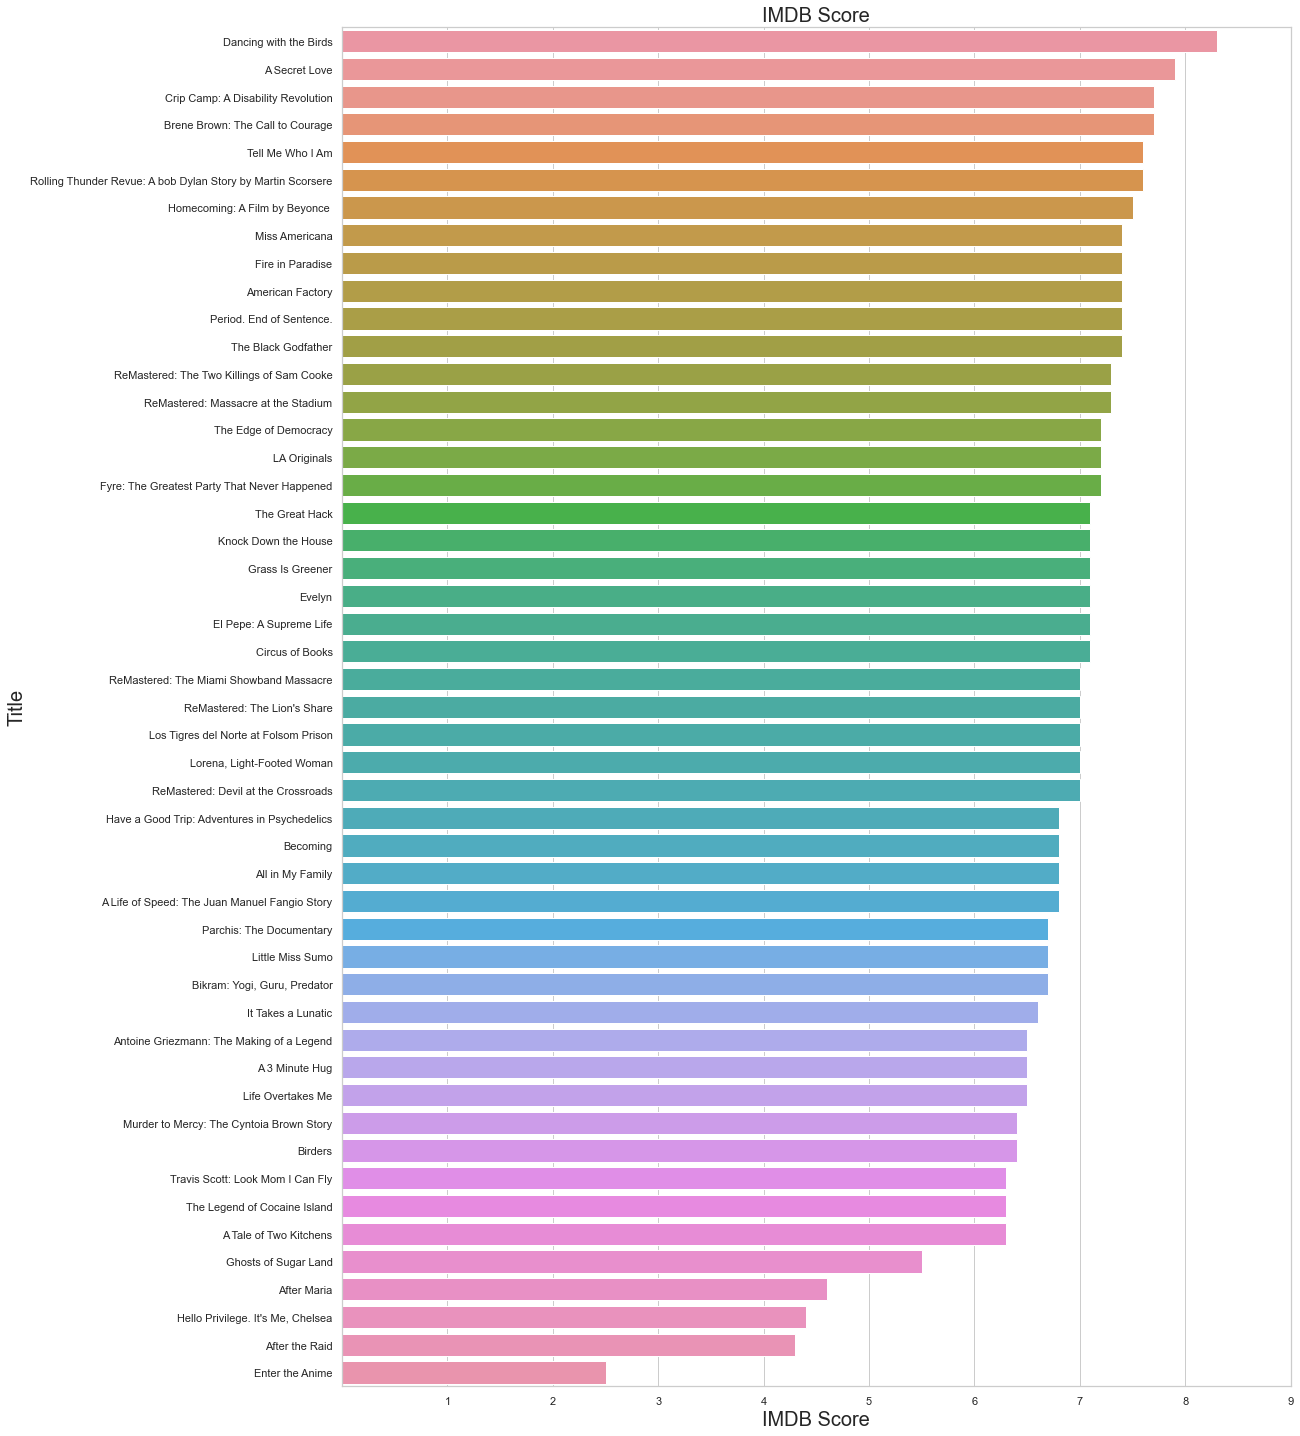

In [15]:
#Visualization
plt.figure(figsize = (17,25))
sns.barplot(x=new_q2["IMDB Score"],y=new_q2["Title"])
plt.title("IMDB Score", fontsize = 20)
plt.xlabel("IMDB Score", fontsize = 20)
plt.xticks(np.arange(1,10,1))
plt.ylabel("Title", fontsize = 20)
plt.show()

### 3-) İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?
### (Which genre has the highest IMDB rating among movies shot in English?)

In [16]:
e_q3 = df[(df["Language"] == "English")]

g_q3 = e_q3.iloc[:,1:2]
imdb_q3 = e_q3.iloc[:,4:6]

cnct_q3 = pd.concat([g_q3, imdb_q3],axis=1)
q3 = cnct_q3.sort_values("IMDB Score", ascending=False)
q3 = q3.reset_index(drop=True)
q3

,Genre,IMDB Score,Language
0,Documentary,9.0,English
1,One-man show,8.5,English
2,Concert Film,8.4,English
3,Concert Film,8.4,English
4,Documentary,8.3,English
...,...,...,...
396,Thriller,4.2,English
397,Documentary,4.1,English
398,Musical/Western/Fantasy,3.9,English
399,Heist film/Thriller,3.7,English


In [17]:
q3.iloc[0,:]
#->Documentary

Genre         Documentary
IMDB Score            9.0
Language          English
Name: 0, dtype: object

### 4-) 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?
### (What is the average 'runtime' of movies shot in 'Hindi'?)

In [18]:
hindi_q4 = df[(df["Language"] == "Hindi")]
q4 = hindi_q4.iloc[:,3:4]
q4.sort_values("Runtime").mean()
#sağlaması
#q4.describe()

Runtime    115.787879
dtype: float64

### 5-) Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.
### (Find the 3 most used languages in the movies in the data set.)

In [19]:
q6 = df["Language"]
q6.value_counts().head(3)

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

### 6-) IMDB puanı en yüksek olan ilk 10 film hangileridir?
### (What are the top 10 movies with the highest IMDB rating?)

In [20]:
title_q7 = df.iloc[:,0:1]
title_q7
imdb_q7 = df.iloc[:,4:5]
imdb_q7

cnct_q7 = pd.concat([title_q7, imdb_q7], axis=1)
cnct_q7.sort_values("IMDB Score", ascending=False).head(10).reset_index(drop=True)

,Title,IMDB Score
0,David Attenborough: A Life on Our Planet,9.0
1,Emicida: AmarElo - It's All For Yesterday,8.6
2,Springsteen on Broadway,8.5
3,Winter on Fire: Ukraine's Fight for Freedom,8.4
4,Taylor Swift: Reputation Stadium Tour,8.4
5,Ben Platt: Live from Radio City Music Hall,8.4
6,Dancing with the Birds,8.3
7,Cuba and the Cameraman,8.3
8,Klaus,8.2
9,13th,8.2


### 7-) IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.
### (What is the correlation between IMDB score and 'Runtime'? Examine and visualize.)

,Runtime,IMDB Score
Runtime,1.000000,-0.040896
IMDB Score,-0.040896,1.000000


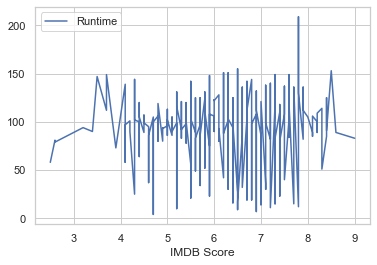

In [21]:
data = df[['Runtime','IMDB Score']]
data.plot('IMDB Score','Runtime')
correlation = data.corr(method='pearson')
correlation

### 8-) IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.
### (Which are the top 10 'Genre' with the highest IMDB Score? Visualize it.)

In [22]:
genre_q9 = df.iloc[:,1:2]
imdb_q9 = df.iloc[:,4:5]

cnct_q9 = pd.concat([genre_q9, imdb_q9], axis=1)
q9 = cnct_q9.sort_values("IMDB Score", ascending=False).reset_index(drop=True).head(10)
q9

,Genre,IMDB Score
0,Documentary,9.0
1,Documentary,8.6
2,One-man show,8.5
3,Documentary,8.4
4,Concert Film,8.4
5,Concert Film,8.4
6,Documentary,8.3
7,Documentary,8.3
8,Animation/Christmas/Comedy/Adventure,8.2
9,Documentary,8.2


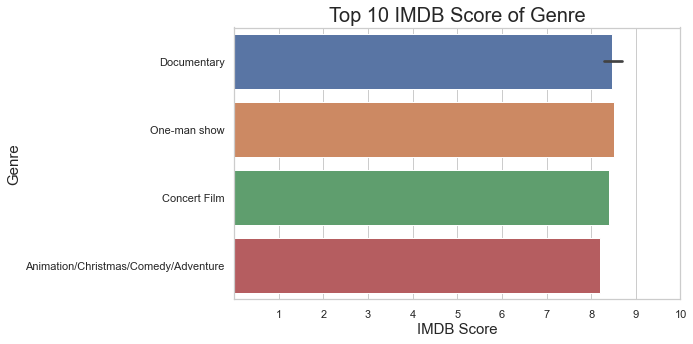

In [23]:
#Visualization
plt.figure(figsize=(8,5))
sns.barplot(data=q9, x=q9["IMDB Score"], y=q9["Genre"])
plt.title("Top 10 IMDB Score of Genre", fontsize=20)
plt.xlabel("IMDB Score", fontsize=15)
plt.ylabel("Genre", fontsize=15)
plt.xticks(np.arange(1,11,1))
plt.show()

### 9-) 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.
### (What are the top 10 movies with the highest 'runtime'? Visualize it.)

In [24]:
#split
title_q10 = df.iloc[:,0:1]
rntm_q10 = df.iloc[:,3:4]

#concat
cnct_q10 = pd.concat([title_q10, rntm_q10], axis = 1)
q10 = cnct_q10.sort_values("Runtime", ascending=False).reset_index(drop=True).head(10)
q10


,Title,Runtime
0,The Irishman,209
1,Da 5 Bloods,155
2,Springsteen on Broadway,153
3,Citation,151
4,The Forest of Love,151
5,Raat Akeli Hai,149
6,The Last Days of American Crime,149
7,Ludo,149
8,Army of the Dead,148
9,Drive,147


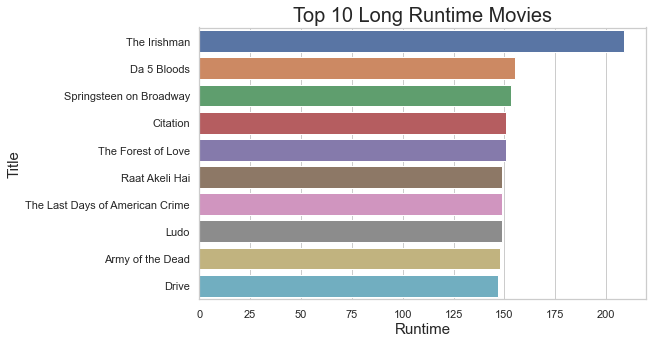

In [25]:
#Visualization
plt.figure(figsize=(8,5))
sns.barplot(data=q10, x=q10["Runtime"], y=q10["Title"])
plt.title("Top 10 Long Runtime Movies", fontsize=20)
plt.xlabel("Runtime", fontsize=15)
plt.ylabel("Title", fontsize=15)
plt.show()

### 10-) Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz
### (In which year was the most movies released? visualize)

In [26]:
year = pd.DatetimeIndex(df['Premiere']).year
year = pd.DataFrame(year)

year_cnts = year["Premiere"].value_counts()
year_cnts = pd.DataFrame(year_cnts)
year_cnts["Count"] = year_cnts["Premiere"]
del year_cnts["Premiere"]
year_cnts

year_np = np.arange(2014,2022,1)
year_np = pd.DataFrame(year_np, index=range(2014,2022),columns=["Years"])

final = pd.concat([year_np, year_cnts], axis=1)

q11 = final.sort_values("Count", ascending=False).reset_index(drop=True)
q11

,Years,Count
0,2020,183
1,2019,125
2,2018,99
3,2021,71
4,2017,66
5,2016,30
6,2015,9
7,2014,1


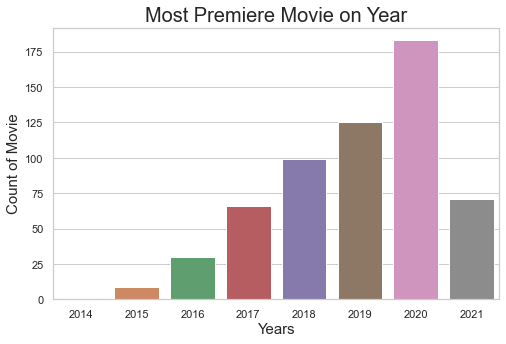

In [27]:
#Visualization
plt.figure(figsize = (8,5))
sns.barplot(x=q11["Years"], y=q11["Count"])
plt.title("Most Premiere Movie on Year", fontsize=20)
plt.xlabel("Years", fontsize=15)
plt.ylabel("Count of Movie", fontsize=15)
plt.show()